In [1]:
from google.colab import files
import io
upload=files.upload()

Saving deaths.csv to deaths.csv


In [60]:
import pandas as pd
df=pd.read_csv('deaths.csv')
df

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,0-4,1
1,2017,1,Ciutat Vella,2,el Barri Gòtic,0-4,1
2,2017,1,Ciutat Vella,3,la Barceloneta,0-4,0
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",0-4,0
4,2017,2,Eixample,5,el Fort Pienc,0-4,0
...,...,...,...,...,...,...,...
4594,2015,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,>=100,1
4595,2015,10,Sant Martí,70,el Besòs i el Maresme,>=100,3
4596,2015,10,Sant Martí,71,Provençals del Poblenou,>=100,2
4597,2015,10,Sant Martí,72,Sant Martí de Provençals,>=100,1


In [82]:
df1=df[['Year', 'Number','Neighborhood.Code']]
df1.shape

(4599, 3)

In [81]:
df_nei=df1.groupby(['Neighborhood.Code'])
df_nei.head()

,Year,Number,Neighborhood.Code
0,2017,1,1
1,2017,1,2
2,2017,0,3
3,2017,0,4
4,2017,0,5
...,...,...,...
360,2017,0,69
361,2017,0,70
362,2017,0,71
363,2017,0,72


In [73]:
df_nei.head()

,Year,District.Code,District.Name,Neighborhood.Code,Neighborhood.Name,Age,Number
0,2017,1,Ciutat Vella,1,el Raval,0-4,1
1,2017,1,Ciutat Vella,2,el Barri Gòtic,0-4,1
2,2017,1,Ciutat Vella,3,la Barceloneta,0-4,0
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",0-4,0
4,2017,2,Eixample,5,el Fort Pienc,0-4,0
...,...,...,...,...,...,...,...
360,2017,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,20-24,0
361,2017,10,Sant Martí,70,el Besòs i el Maresme,20-24,0
362,2017,10,Sant Martí,71,Provençals del Poblenou,20-24,0
363,2017,10,Sant Martí,72,Sant Martí de Provençals,20-24,0


In [113]:
import pandas as pd 
import seaborn as sns
df_num = df.select_dtypes(include='number') # keep only numeric variables 
df_num_nonans = df_num.dropna() # remove observations with NaNs
print('datos originales = {}'.format(df.shape))
print('datos numericos = {}'.format(df_num.shape))
print('datos numericos sin NaNs = {}'.format(df_num_nonans.shape))

datos originales = (4599, 7)
datos numericos = (4599, 4)
datos numericos sin NaNs = (4599, 4)


In [91]:
df_num.columns

Index(['Year', 'District.Code', 'Neighborhood.Code', 'Number'], dtype='object')

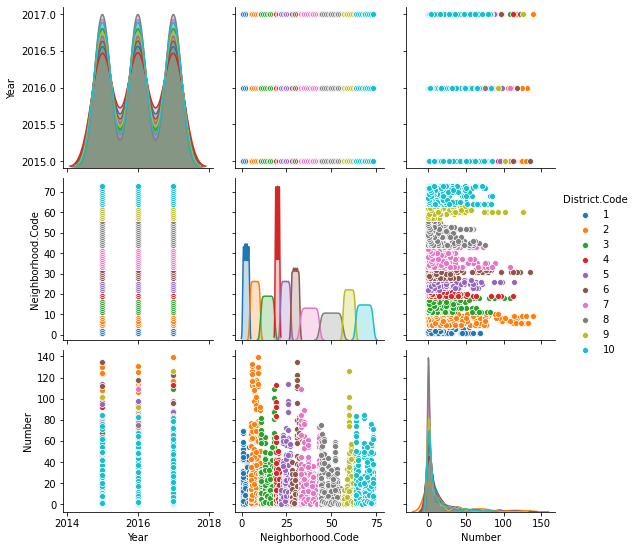

In [129]:
import seaborn as sns; 

sns.pairplot(df_num,hue='District.Code')

In [0]:
X = df_num[['Year', 'Number','Neighborhood.Code']]# features
y=df['District.Code']

In [0]:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

In [145]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=3).fit(XS)
100*pca.explained_variance_ratio_

array([37.09237535, 33.33333333, 29.57429132])

In [146]:
100*pca.explained_variance_ratio_.cumsum()

array([ 37.09237535,  70.42570868, 100.        ])

In [147]:
Xproj = pca.transform(XS)
Xproj.shape

(4599, 3)

In [148]:
print('Valores propios = {} {}  '.format(*pca.explained_variance_))
print('Fracción de la varianza explicada = {} {}'.format(*pca.explained_variance_ratio_))

Valores propios = 1.1130132725270747 1.0002174858634187  
Fracción de la varianza explicada = 0.3709237535028986 0.3333333333333334


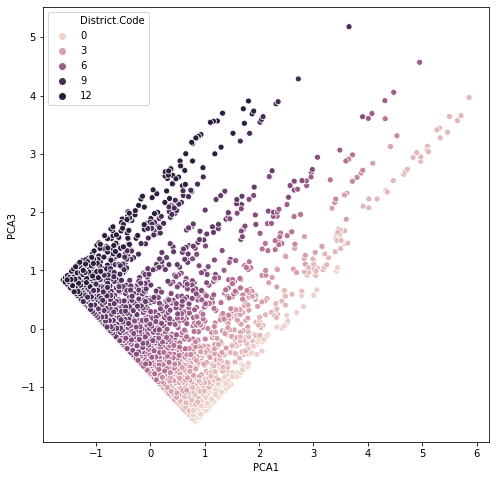

In [156]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

dfpca = pd.DataFrame(Xproj[:,0:3],columns=['PCA1', 'PCA2','PCA3'])

fig = plt.figure(figsize=(8,8))

ax = sns.scatterplot(x="PCA1", y="PCA3",hue=y,data=dfpca)
plt.show()

In [169]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
y = df['District.Code']
print('Data shape: {}'.format(X.shape))
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
print('Mantained features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

Data shape: (4599, 3)
Mantained features: [False False  True]
Raking of the features: [2 3 1]


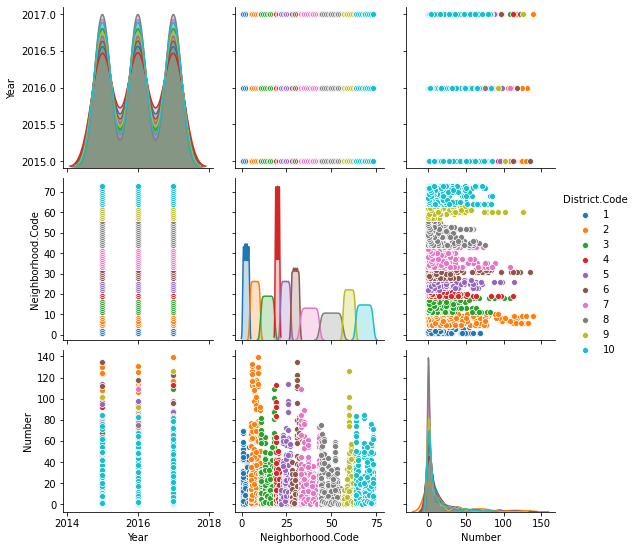

In [160]:
import seaborn as sns; 

sns.pairplot(df_num,hue='District.Code')